In [2]:
import spectre as se
import spectre
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import UnivariateSpline

import sys
sys.path.insert(1, '../quantarhei')
import quantarhei as qr

#import spectre.novibs as senv
import spectre.full as sef
import spectre.spectroscopy.abs_spectroscopy as abss
#from spectre.spectroscopy.spec_utils import iterate_parameter

from spectre.matplotlib_latex import *
plt_latex()

from matplotlib.ticker import MultipleLocator, AutoMinorLocator, MaxNLocator

np.set_printoptions(precision=5, linewidth=370, suppress=True)

In [3]:
def func(om, t=1):
    out = 1 / (1.0j * om) * (np.exp(1.0j * om *t) - 1)
    return out

Text(0, 0.5, 'arbitrary units')

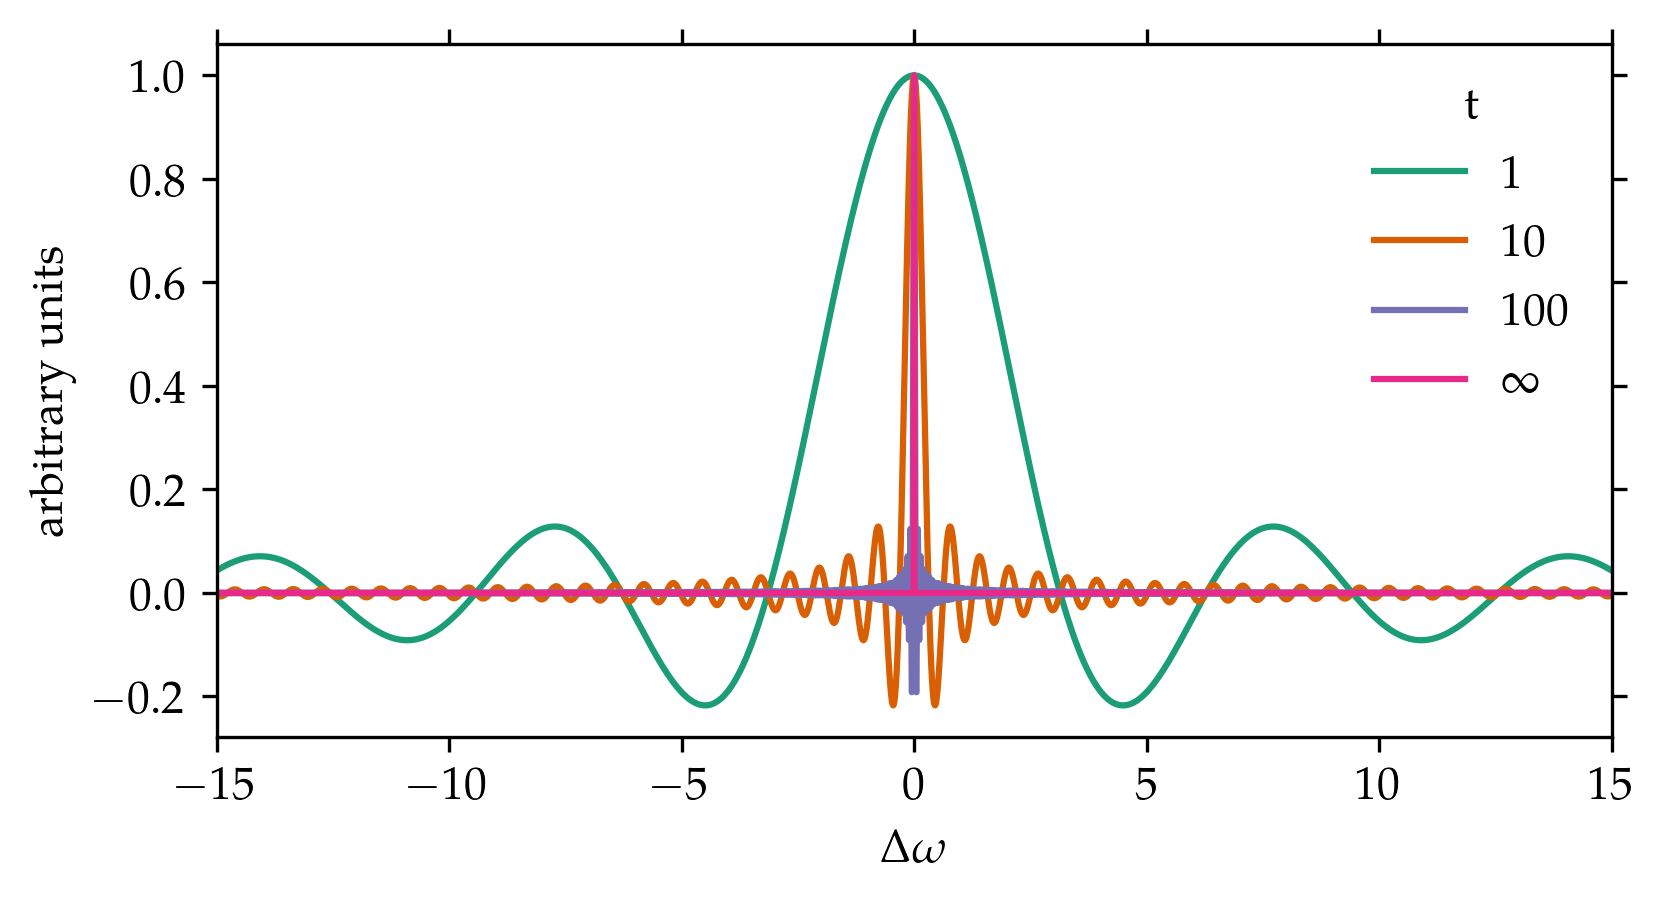

In [104]:
lim = 15
x = np.arange(-lim, lim, 0.01)

fig, ax = plt.subplots(figsize=(6,3), dpi=300)
format_ticks(ax)

for tt in [1,10,100]:
    y = func(x, t=tt)
    plt.plot(x, y/max(y), label=tt)

y = func(x, t=10e10)
plt.plot(x, y/max(y), label=r'$\infty$')

plt.xlim(-lim, lim)
plt.legend(frameon=False,title='t')
plt.xlabel(r'$\Delta\omega$')
plt.ylabel(r'arbitrary units')

In [4]:
def func2(t, om=1):
    out = 1 / (1.0j * om) * (np.exp(1.0j * om *t) - 1)
    return out

Text(0, 0.5, 'imaginary part')

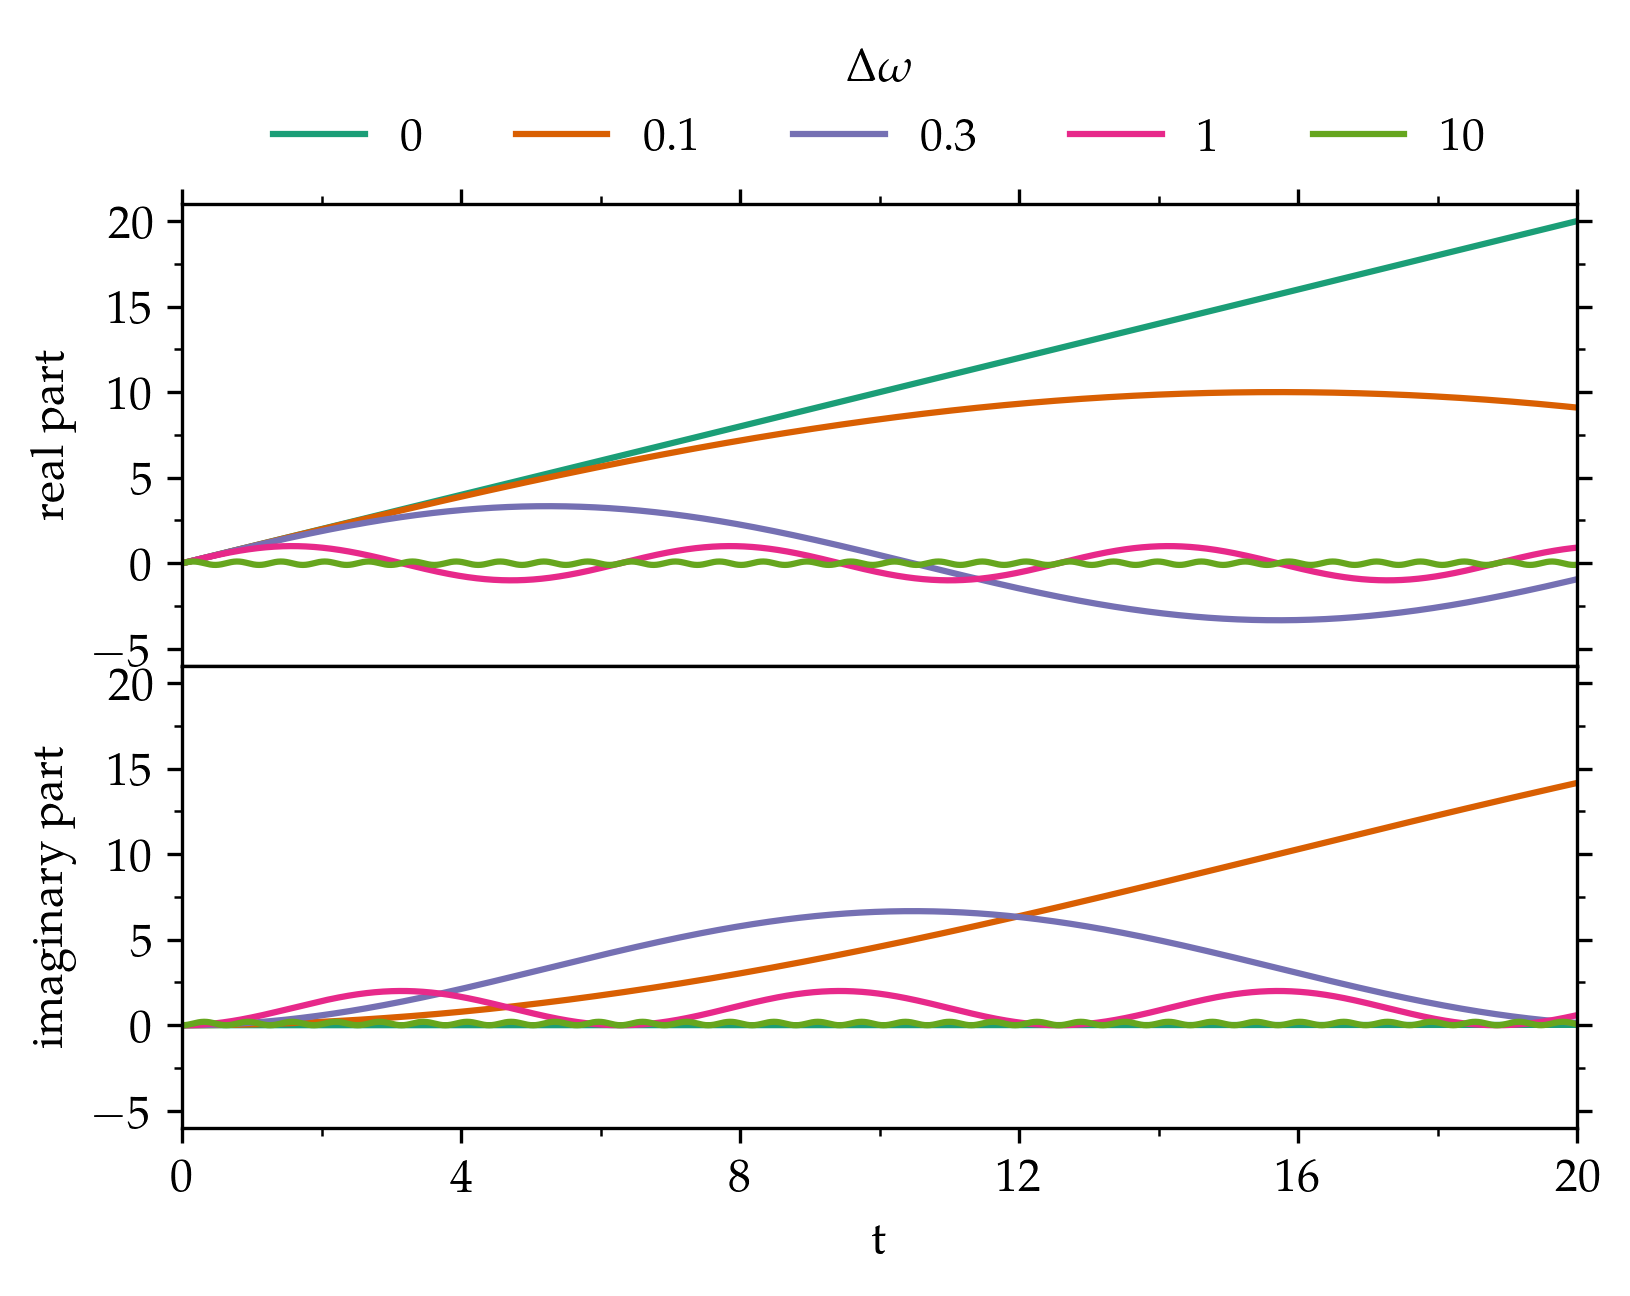

In [129]:
lim = 20
x = np.arange(0, lim, 0.01)

fig, ax = plt.subplots(2,1,figsize=(6,4), dpi=300, sharex=True)
plt.subplots_adjust(hspace=0, wspace=0)

for g in ax:
    pars = dict(labelbottom=False, labeltop=False, labelleft=True, labelright=False,
                bottom=True,           top=True,      left=True,      right=True,)
    
    format_ticks(g)
    g.tick_params(which='both', **pars)
    
    g.yaxis.set_major_locator(MaxNLocator(nbins=6))
    g.yaxis.set_minor_locator(AutoMinorLocator(2))
    g.xaxis.set_major_locator(MaxNLocator(nbins=6))
    g.xaxis.set_minor_locator(AutoMinorLocator(2))
    g.set_ylim(-6,21)
    
ax[0].tick_params(which='both', labelbottom=False, labelleft=True)   
ax[1].tick_params(which='both', top=False, labelbottom=True)

labs = [0.1,0.3,1,10]

y = func2(x, om=10e-5)
ax[0].plot(x, np.real(y), label=0)

for tt in labs:
    y = func2(x, om=tt)
    ax[0].plot(x, np.real(y), label=tt)

y = func2(x, om=10e-5)
ax[1].plot(x, np.imag(y), label=0)

for tt in labs:
    y = func2(x, om=tt)
    ax[1].plot(x, np.imag(y), label=tt)

plt.xlim(0, lim)
plt.legend(frameon=False, title=r'$\Delta\omega$', loc='lower center', bbox_to_anchor=(0.5,2.0), ncol=len(labs)+1)
plt.xlabel(r't')
ax[0].set_ylabel(r'real part')
ax[1].set_ylabel(r'imaginary part')
#plt.tight_layout()

Text(0, 0.5, 'imaginary part')

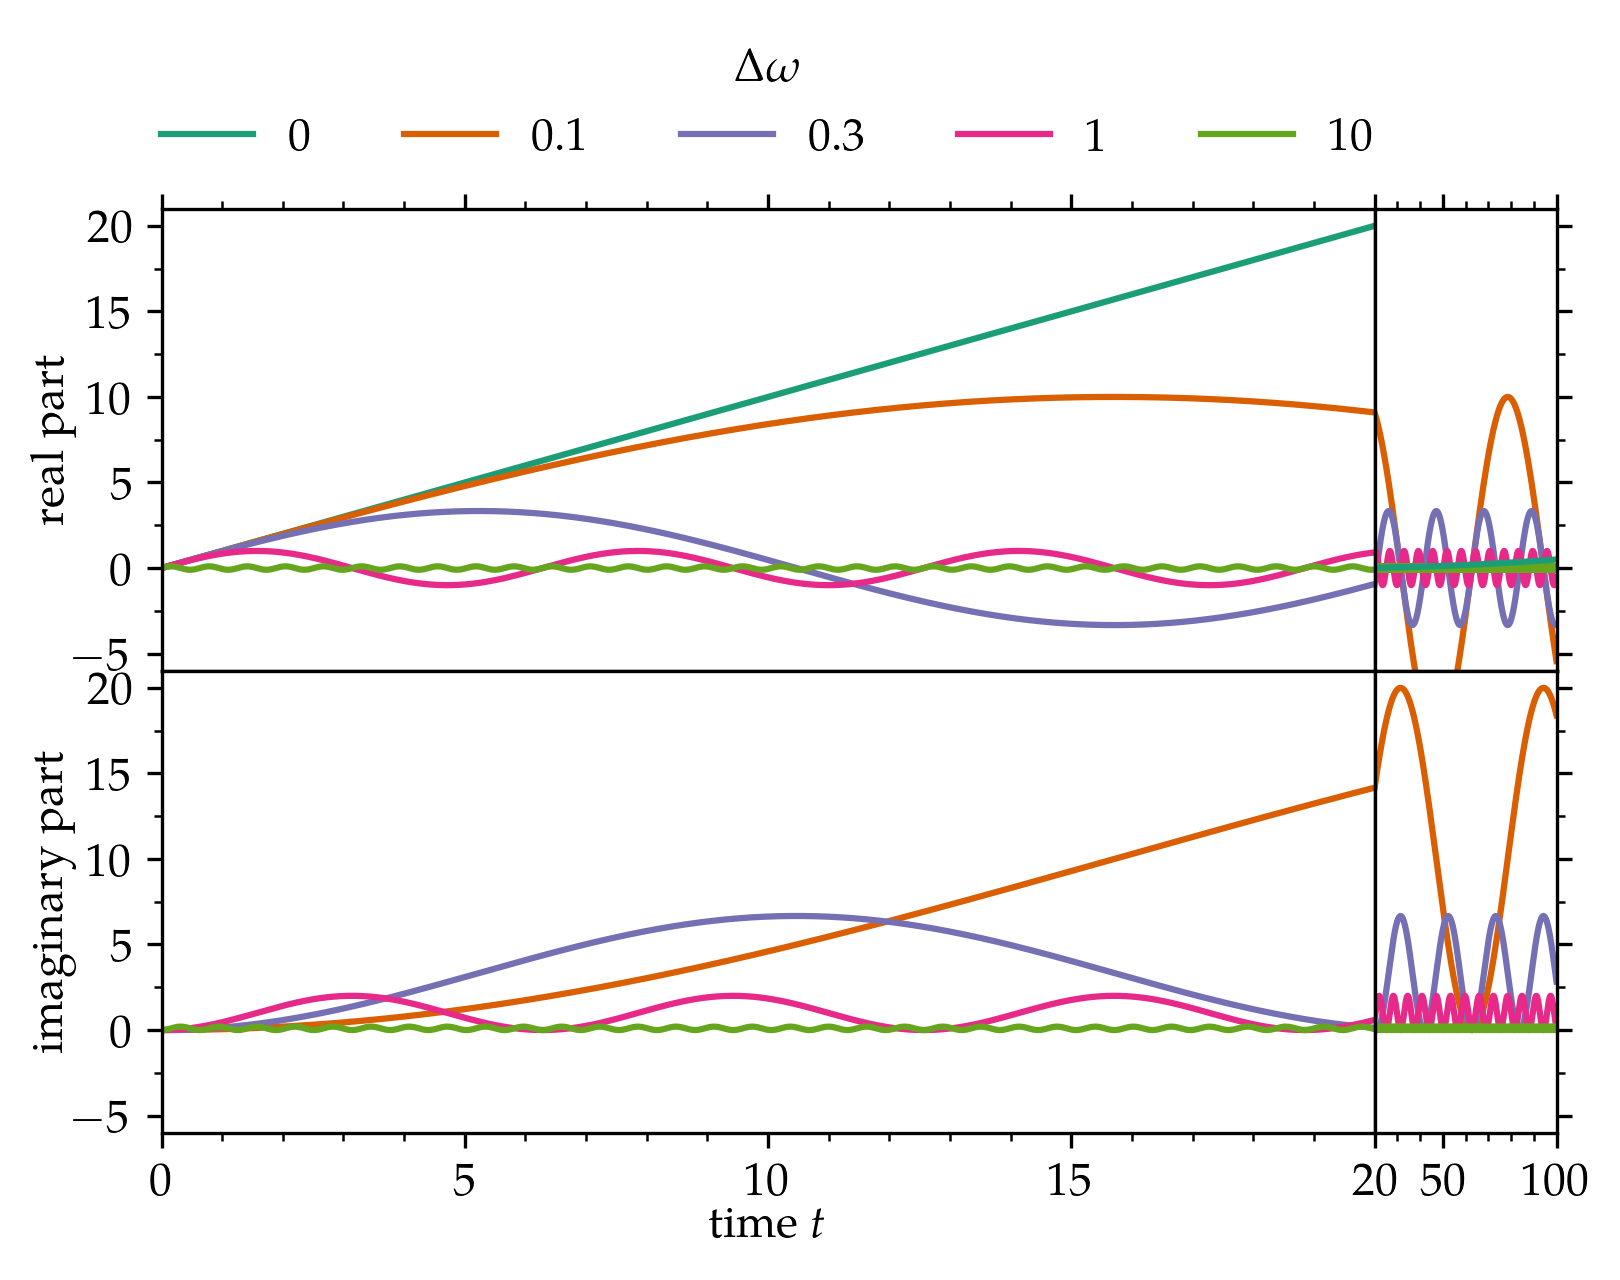

In [52]:
lim = 20
x = np.arange(0, 100, 0.01)


fig, ax = plt.subplots(2,2,figsize=(6,4), dpi=300, width_ratios=(10,1.5))
plt.subplots_adjust(hspace=0, wspace=0)

ax = ax.flatten()
for g in ax:
    pars = dict(labelbottom=False, labeltop=False, labelleft=False, labelright=False,
                bottom=False,           top=False,      left=False,      right=False,)
    
    format_ticks(g)
    g.tick_params(which='both', **pars)
    
    g.yaxis.set_major_locator(MaxNLocator(nbins=6))
    g.yaxis.set_minor_locator(AutoMinorLocator(2))
    g.xaxis.set_major_locator(MaxNLocator(nbins=4))
    g.xaxis.set_minor_locator(AutoMinorLocator(5))
    g.set_ylim(-6,21)


ax[0].tick_params(which='both', labelbottom=False, labelleft=True, top=True, left=True)   
ax[1].tick_params(which='both', labelbottom=False, top=True, right=True)
ax[2].tick_params(which='both', labelbottom=True, labelleft=True, left=True, bottom=True)
ax[3].tick_params(which='both', labelbottom=True, right=True, bottom=True)

labs = [0.1,0.3,1,10]

cyc = get_color_linestyle_cycler()
col = next(cyc)

y = func2(x, om=10e-5)
ax[0].plot(x, np.real(y), label=0, **col)

for tt in labs:
    y = func2(x, om=tt)
    col = next(cyc)
    ax[0].plot(x, np.real(y), label=tt, **col)
    ax[1].plot(x, np.real(y), label=tt, **col)

cyc = get_color_linestyle_cycler()

col = next(cyc)
y = func2(x, om=10e-5)
ax[1].plot(x, np.imag(y), label=0, **col)

for tt in labs:
    y = func2(x, om=tt)
    col = next(cyc)
    ax[2].plot(x, np.imag(y), label=tt, **col)
    ax[3].plot(x, np.imag(y), label=tt, **col)

ax[1].sharey(ax[0])
ax[3].sharey(ax[2])
ax[0].sharex(ax[2])
ax[1].sharex(ax[3])

ax[3].xaxis.set_major_locator(MaxNLocator(nbins=1))
ax[3].xaxis.set_minor_locator(AutoMinorLocator(5))

ax[0].set_xlim(0, lim)
ax[1].set_xlim(lim, 100)
ax[0].legend(frameon=False, title=r'$\Delta\omega$', loc='lower center', bbox_to_anchor=(0.5,1.01), ncol=len(labs)+1)
ax[2].set_xlabel(r'time $t$', labelpad=-1)
ax[0].set_ylabel(r'real part', labelpad=-1)
ax[2].set_ylabel(r'imaginary part', labelpad=-1)
#plt.tight_layout()

In [11]:
ax.flatten()

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)